# Tail Bounds and Concentration Inequalities

In [1]:
import numpy as np
from scipy import stats
from IPython.display import YouTubeVideo

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

*Throughout this section, we'll need to be a bit more precise, so we'll use uppercase letters to represent random variables, and lowercase letters to represent the values they take on.*

*You may find it helpful to review Sections [12.3](https://data140.org/textbook/content/Chapter_12/03_Bounds.html) and [19.4](https://data140.org/textbook/content/Chapter_19/04_Chernoff_Bound.html) of the Data 140 textbook.*

## Motivation and Introduction

### What is a Concentration Inequality?

Concentration inequalities provide a way to quantify how likely a random variable is to be in the **tail** of its distribution (that is, the parts of the distribution on the far ends, away from the mean). We often will write these inequalities involving the distance between a random variable $X$ and its mean $E[X]$. For example, consider the following inequality:

$$P(|X-E[X]|\geq t) \leq \epsilon$$

This looks at the distance between random variable $X$ and its mean $E[x]$, and says that the probability of that distance being large (specifically, larger than some threshold $t$) is small (specifically, smaller than some value $\delta$).

Such inequalities are useful in understanding the behavior of arbitrary random variables, as well as algorithms that use random variables. For example, consider a sample of i.i.d. random variables $X_1, \ldots, X_n$, and their sample mean:

$$
Y = \frac{1}{n} \sum_i X_i 
$$

If we're using $Y$ to estimate the mean of $X_i$, then we can already guarantee that the average value of $Y$ will be the correct answer: $E[Y] = E\left[(1/n) \sum_i X_i\right] = E[X_i]$. But this statement doesn't tell us anything about our chance of being far off from the correct answer. Is it possible that $Y$ could be very far away from $E[X_i]$? How likely is such a thing to happen?

Concentration inequalities provide the answers to such questions: if we can guarantee that

$$
P(|Y - E[X_i]| \geq t) \leq \epsilon,
$$

then we can have more confidence in our result. Suppose that the above statement holds for $t=1$ and $\epsilon=0.01$. Then we can clearly state "$Y$ is very likely to be within $1$ of the true mean $E[X_i]$: the probability that it's further away is less than $1\%$."

If the $X_i$ are drawn from a well-known distribution such as the Gaussian, binomial, Poisson, etc., then we can compute such probabilities exactly, and we have no need for a concentration inequality. These inequalities are useful when we have less information about a random variable, and we want to make strong statements that hold **regardless of the specific distribution**. 

In [2]:
YouTubeVideo('KiD4SHKpVho')

The inequality above is a two-sided inequality, because it looks at both the upper and lower tails. Sometimes, we'll also consider **one-sided** concentration inequalities, such as $\mathbb{P}(X-E[X] \geq t) \leq \epsilon$ or $\mathbb{P}(X-E[X] \leq -t) \leq \epsilon$.

### Why are we interested in concentration inequalities?

In [3]:
YouTubeVideo('AmPJr9F90wQ')

###  Example: One-sided Upper Tail Bound

We'll start by looking at the upper tail bound for a random variable $X$ with unknown density $f$ and corresponding CDF $F$. Specifically, we want to find a probabilistic upper bound $\alpha$ such that most of the time, $X$ takes on values less than $\alpha$. Formally, we can write this one of two ways:

$$
\begin{align*}
P(X \geq \alpha) &\leq \epsilon \\
P(X < \alpha) &\geq 1-\epsilon
\end{align*}
$$

For small values of $\epsilon$, we can interpret this statement as saying that we are confident that $X$ will be below $\alpha$. For this reason, we'll use the following terminology:
* $\alpha$ is our **upper confidence bound**,
* $\epsilon$ is our **failure probability**, and
* $1-\epsilon$ is our **confidence level**.

In general, we can express the bound as $\alpha(\epsilon)$ to show the dependence explicitly: we specify some desired level of confidence (or failure probability), and find a bound that holds for that level. In practice, we want these bounds to be as small as possible: we can always choose a trivial bound at $\infty$, but this isn't useful to us. So, we want $\alpha(\epsilon)$ to grow relatively slowly as a function of $\epsilon$.

Suppose we choose $\epsilon = 0.05$, and we want a value of $\alpha(0.05)$ that satisfies the inequality above. If $f$ and $F$ were known, we could easily compute such a value by solving for $\alpha$ (for this example, we'll assume $X$ is continuous so that $P(X < \alpha) = P(X \leq \alpha)$):

$$
\begin{align*}
P(X \leq \alpha) &\geq 1-\epsilon \\
F(\alpha) &\geq 1 - \epsilon \\
\alpha &\geq F^{-1}(1-\epsilon)
\end{align*}
$$

In other words, if we knew the CDF $F$ (and therefore the inverse CDF $F^{-1}$), we could calculate $\alpha(0.05) = F^{-1}(0.95)$. 

What if we don't know the CDF? If we don't know anything at all about the random variable $X$, then we're stuck: we can't really make any statement about $\alpha$ that would apply to any arbitrary random variable. But, we'll see that if we make just a few assumptions, or just know a few things about $X$, then we can make some interesting statements.

###  Example: Sample Mean

One of the most common applications of concentration inequalities is to sample means. We'll return to the example of a sequence of i.i.d. random variables $X_1, \ldots, X_n$ with mean $\mu$, and their sample mean $Y = (1/n)\sum X_i$.

## Markov's Inequality

We'll start by assuming that $X$ is **nonnegative**, and that we know its mean $E[X]$. Note that these are fairly weak assumptions: if we know that $E[X] = 10$ and that $X$ is nonnegative, there are an enormous number of possible densities for $X$! Markov's inequality holds for all of them, and it tells us:

**Markov's inequality**: For a nonnegative random variable $X$ and bound $\alpha > 0$, we have

$$P(X \geq \alpha) \leq \frac{E[X]}{\alpha}.$$



**Exercise**: *Suppose a slot machine has a payout of $\$10$. Which of the following are possible values for the probability that the machine pays out exactly $\$100$?*
$2\%, 4\%, 5\%, 7\%$

In [4]:
YouTubeVideo('DlY81PW4VEg')

### Understanding properties of Markov's inequality

Let's use Markov's inequality to derive a general upper confidence bound that will hold for any nonnegative random variable. If we want $P(X \geq \alpha) \leq \epsilon$ for a given value of $\epsilon$ (i.e., a desired confidence level / failure probability), then we have $\epsilon = E[X]/\alpha$, or equivalently $\alpha = E[X]/\epsilon$. We can make some important observations about this bound:

* As $\epsilon$ decreases, $\alpha$ increases. Convince yourself that this makes sense: if we want our bound $\alpha$ to have a very small probability of failing (i.e., to have a very small probability that the random variable takes on a value above the bound), then we must make the bound very large.
* *How fast does our bound increase as $\epsilon$ gets small?* As we noted above, a good bound will increase relatively slowly. Unfortunately, Markov's inequality provides a relatively poor bound: the bound increases as $O(\epsilon^{-1})$, which for most random variables is not a very tight bound.

### Example: Sample Mean with Markov's Inequality

Given $X_1, \ldots, X_n$ and their sample mean $Y$, how well does Markov's inequality answer the question of whether $Y$ can be far from the true mean $\mu$?

$$
P(Y - \mu \geq \alpha) = P(Y \geq \mu + \alpha) \leq \frac{\mu}{\alpha}
$$

This is a remarkably poor bound! In particular, note that it doesn't even improve as the number of samples $n$ grows larger. If we were to ask for an upper confidence bound $\alpha(\epsilon, n)$ at a given level of confidence $\epsilon$ for a given number of samples $n$, we would see that this bound also has no dependence on $n$: in other words, it remains the same regardless of how many samples we collect. This is contrary to our intuition about sample means: in general, we expect that the more independent samples we collect, the better our result should be. This is something we'll look for in future inequalities.


**Exercises**: 

1. Consider a Poisson random variable $T$ with parameter $\lambda = 5$. Using the PDF/CDF, find the smallest value of $\alpha$ such that $P(T \geq \alpha) \leq 0.05$. Then, use Markov's inequality to find an upper bound on $\alpha$. What does this tell you about the usefulness of Markov's inequality in this example?

2. Now, let $T_i \sim \mathrm{Poisson}(\lambda)$, for $i = 1, 2, \ldots, n$, and let $S$ be the sample mean of the $T_i$. If $\lambda = 5$, find the smallest value $\alpha$ such that $P(S \geq \alpha) \leq 0.05$ (*hint: use [the fact that the sum of independent Poisson RVs is also Poisson](https://data140.org/textbook/content/Chapter_07/01_Poisson_Distribution.html#sums-of-independent-poisson-variables)*). Then use Markov's inequality to find an upper bound on $\alpha$. How does the difference compare to Exercise 1?

*Hint: you may find the [`scipy.stats.poisson.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) function useful for both exercises.*

As we'll see, part of the reason Markov's inequality provides such a weak bound is that it uses very limited information. 

### Video example: flipping biased coins

In [5]:
YouTubeVideo('zq_JwBjlIbU')

## Chebyshev's inequality and higher moments

What if we use more information? Specifically, suppose we use both the mean and the variance. To do so, let's consider a random variable $X$, for which we want to bound tail probabilities, and then the random variable $Z = (X-E[X])^2$. We can see that $Z$ is always nonnegative, and by the definition of variance, $E[Z] = \mathrm{var}(X)$. So, if we apply Markov's inequality to $Z$, we arrive at Chebyshev's inequality:

**Chebyshev's inequality**: Consider a random variable $X$ with known (finite) mean and variance. For any $t > 0$,

$$
\mathbb{P}(\vert X - E[X] \vert \ge t) \le \frac{\mathrm{var}(X)}{t^2}
$$

*Proof:*

$$
\begin{align*}
P(\vert X - E[X] \vert \geq t) 
    &= P((X - E[X])^2 \geq t^2) \\
    &= P(Z \geq t^2) \\
    &\leq \frac{E[Z]}{t^2}  \\
    &= \frac{\mathrm{var}(X)}{t^2} \blacksquare
\end{align*}
$$


### Understanding properties of Chebyshev's inequality

This tells us that the X is unlikely to be far away from its mean: the probability that the distance $|X-E[X]|$ is large (specifically, larger than $t$), decreases proportional to var$(X)$ and inversely proportional to $t^2$.

Let's use Chebyshev's inequality to derive a general upper confidence bound that will hold for any random variable with known mean and variance. If we want $P(X \geq \alpha) \leq \epsilon$ for a given value of $\epsilon$, we need to do some algebra first before we can apply Chebyshev's inequality.

$$
\begin{align*}
P(X \geq \alpha)
    &= P(X - E[X] \geq \alpha - E[X]) \\
    &\leq P(|X - E[X]| \geq \alpha - E[X]) \\
    &\leq \frac{\mathrm{var}(X)}{(\alpha - E[X])^2},
\end{align*}
$$

So, we have $\epsilon = \frac{\mathrm{var}(X)}{(\alpha - E[X])^2}$. While we could use the quadratic formula to obtain an expression for $\alpha(\epsilon)$, the most important observations here are:

* The bound $\alpha(\epsilon)$ is directly proportional to the variance of $X$
* *How fast does our bound increase as $\epsilon$ gets small?* The bound $\alpha(\epsilon)$ is proportional to $\epsilon^{-1/2}$ (i.e., it increases as $O(\epsilon^{-1/2})$, which is a significant improvement over what we saw with Markov's inequality. The question remains: can we do better?



### Example: Sample Mean with Chebyshev's Inequality

Given $X_1, \ldots, X_n$ and their sample mean $Y$, how well does Chebyshev's inequality answer the question of whether $Y$ can be far from the true mean $\mu$?

$$
P(|Y - \mu| > \alpha) \leq \frac{\mathrm{var}(Y)}{\alpha^2} = \frac{\mathrm{var}(X_i)}{n\alpha^2},
$$

where we use the fact that the $X_i$ are independent to derive $\mathrm{var}(Y) = \frac{1}{n^2} \sum \mathrm{var}(X_i) = \mathrm{var}(X_i)/n$. 

This is significantly better than the bound from Markov's inequality: it tells us that as $n$ increases, the probability decreases proportional to $1/n$. What if we were to ask for an upper confidence bound $\alpha(\epsilon, n)$ at a given level of confidence $\epsilon$, for a given number of samples $n$?

$$
\begin{align*}
\epsilon &= \frac{\mathrm{var}(X_i)}{n\alpha^2} \\
\alpha &= \frac{\sigma_{X_i}}{\sqrt{n\epsilon}}
\end{align*}
$$

We see a dependence on $\frac{1}{\sqrt{n}}$, which tells us how fast our bound shrinks as the number of samples increases.


**Exercise**: Consider again the i.i.d. Poisson random variables $T_i$ and their sample mean $S$. Use Chebyshev's inequality to find the smallest value $\alpha$ such that $P(S \geq \alpha) \leq 0.05$. How does your result compare to the true probability and to the Markov bound?

### Video example: flipping biased coins with Chebyshev's inequality

In [6]:
YouTubeVideo('WGdIZWKf9eQ')

### Higher moment bounds

Chebyshev's inequality uses the first and second moments ($E[X]$ and $E[X^2]$). For any nonnegative random variable $X$ and for any natural number $k$, we can apply Markov's inequality to $X^k$, obtaining higher **moment bounds**:

$$
\mathbb{P}(X \geq \alpha)  \leq \frac{E[X^k]}{\alpha^k}
$$

Some important observations:

* If we use this to find an upper confidence bound $\alpha(\epsilon)$ as above, we can derive that the bound increases as $O(\epsilon^{-1/k})$, which for large values of $k$ can be very small.
* Using such bounds requires additional information about the random variable $X$: in fact, if we knew exactly all the moments $E[X^k]$ for $k = 1, 2, \ldots$, then we would most likely also know the CDF.

## Moment generating function and Chernoff's method

*You may find it helpful to review [Section 19.2 of the Data 140 textbook](https://data140.org/textbook/content/Chapter_19/02_Moment_Generating_Functions.html).*

Recall from calculus that we can write the exponential function $e^x$ using aa Taylor series as:

$$
e^x = 1 + x + \frac{1}{2!} x^2 + \frac{1}{3!} x^3 + \frac{1}{4!} x^4 + \cdots,
$$

Motivated by this, and by our observation earlier that we can use the higher moments of a random variable to establish better tail bounds, we'll examine the **moment-generating function** (or MGF) of a random variable $X$:

$$
M_X(\lambda) = E[e^{\lambda X}] = 1 + \lambda E[X] + \frac{\lambda^2}{2!} E[X^2] + \frac{\lambda^3}{3!} E[X^3] + \cdots
$$

A very important fact about MGFs is that for a sum of independent random variables $Y = X_1 + \cdots + X_n$, the MGF of $Y$ is equal to the product of the MGFs for each $X_i$:

$$
\begin{align*}
M_Y(\lambda) 
    &= E\left[e^{\lambda Y}\right] \\
    &= E\left[e^{\sum_{i=1}^n  \lambda X_i}\right] \\
    &= E\left[\prod_{i=1}^n e^{\lambda X_i}\right] \\
    &= \prod_{i=1}^n E\left[e^{\lambda X_i}\right] & \text{(by independence)} \\
    &= \prod_{i=1}^n M_{X_i}(\lambda)
\end{align*}
$$

### Chernoff Bound

Since $e^{\lambda X}$ is a nonnegative random variable, we can again use Markov's inequality to find a bound:

$$
P(X \geq \alpha) = P(E[e^{\lambda X}] \geq e^{\lambda \alpha}) ~ \leq ~
\frac{E[e^{\lambda X}]}{e^{\lambda \alpha}} ~ = ~ \frac{M_X(\lambda)}{e^{\lambda \alpha}}
$$

This is a family of bounds, one for each positive $\lambda$. To get the best possible one (i.e., the smallest), we should minimize over all nonnegative $\lambda$:

$$
P(X \geq \alpha) ~ \leq ~ \min_{\lambda \ge 0} \frac{M_X(\lambda)}{e^{\lambda \alpha}}
$$

This is the **Chernoff bound.** 

In [7]:
YouTubeVideo('YpzSdCD81qg')

Some important observations:

* This requires significantly more information about the distribution than the earlier two bounds we saw. Specifically, if we know all the moments of a distribution, in most cases we effectively know the distribution. But, as we'll see shortly, it can still be useful if we can bound the MGF for an entire class of distributions: in that case, we can replace $M_X(\lambda)$ with an upper bound on it.
* *How fast does our bound increase as $\epsilon$ gets small?* Solving for an upper confidence bound $\alpha(\epsilon)$, we see that $\epsilon = \frac{M_X(\lambda)}{e^{\lambda \alpha}}$. If we were to for $\alpha$, we  would see that it grows as $\log(\epsilon^{-1})$: this is much, much slower than our previous two results! So, if we can find a class of random variables where the MGF is known (or bounded, as in the previous observation), then we can place much tighter bounds on those random variables.


### Example: Sample Mean with Chernoff Bound

Given $X_1, \ldots, X_n$ and their sample mean $Y$, how well does Chernoff's bound answer the question of whether $Y$ can be far from the true mean $\mu$? Because we know about the MGF of a sum of random variables, we'll bound the variable $nY = \sum X_i$:

$$
P(Y - \mu \geq \alpha) = P(nY - n\mu \geq n\alpha) = P(nY \geq n(\mu + \alpha)) \leq \min_{\lambda > 0} \frac{\left[M_{X_i}(\lambda)\right]^n}{e^{\lambda n(\mu+\alpha)}}
$$

This is even better than the Chebyshev bound: as $n$ increases, the probability decreases proportional to $e^{-n}$. 

What if we were to ask for an upper confidence bound $\alpha(\epsilon, n)$ at a given level of confidence $\epsilon$ and a given number of samples $n$? Doing the computation properly would require some more extensive computation due to the implicit optimization over $\lambda$ (specifically, the optimal value of $\lambda$ will depend on $n$), but we would see that the dependence on the confidence level $\epsilon$ is $O(\log(\epsilon^{-1}))$ , and the dependence on the number of samples is (just as with Chebyshev's inequality) $n^{-1/2}$.

**Exercise**: Consider once more the i.i.d. Poisson random variables $T_i$ and their sample mean $S$. Use the Chernoff bound to find the smallest value $\alpha$ such that $P(S \geq \alpha) \leq 0.05$. How does your result compare to the true probability, to the Markov bound, and to the Chebyshev bound? *Hint: you can easily look up the MGF for the Poisson distribution.*

### Video example: flipping biased coins with the Chernoff bound

In [8]:
YouTubeVideo('YpzSdCD81qg')

## (Optional) Example: comparing bounds on a known Gaussian random variable

#### Bounding the probability for a given threshold

We now apply each of the bounds we've learned about to a Gaussian random variable with known mean $\mu$ and variance $\sigma^2$, $X \sim \mathcal{N}(\mu, \sigma^2)$. For this example, we can also compute exact bounds and compare them.

We cannot use Markov's inequality, since this random variable can take on negative values.

Because $X - \mu$ is symmetric about zero, the Chebyshev bound for a single tail is:

$$
P(X - \mu \geq t) = \frac{1}{2}P(|X - \mu| \geq t) \leq \frac{\sigma^2}{2t^2}
$$

Next, let's apply Chernoff's method. Let $Z = X - \mu \sim \mathcal{N}(0, \sigma^2)$. Then $Z$ has MGF $M_Z(\lambda) = e^{\sigma^2 \lambda^2/2}$. So for $\lambda \ge 0$,

$$
\mathbb{P}(X - \mu > t) ~ \le ~ \min_{\lambda \geq 0} \exp \left( \frac{\sigma^2 \lambda^2}{2} - \lambda t \right)
$$

How do we optimize this in $\lambda$? Recognize that since $\exp(x)$ is an increasing function, we have
$$
\min_{\lambda \geq 0} \exp \left( \frac{\sigma^2 \lambda^2}{2} - \lambda t \right) = \exp \left(\min_{\lambda \geq 0} \left\{\frac{\sigma^2 \lambda^2}{2} - \lambda t \right\} \right).
$$

The quantity in the exponent is a quadratic function $f(\lambda)$, and can be minimized using the quadratic formula to get $\lambda^* = \frac{t}{\sigma^2}$, and $f(\lambda^*) = \frac{-t^2}{2\sigma^2}$.

Putting everything together, we get
$$
P(X-\mu > t) ~\leq ~\exp\left(-\frac{t^2}{2\sigma^2}\right)
$$

Let's visualize these two bounds along with the exact probability (which we can calculate using the CDF):

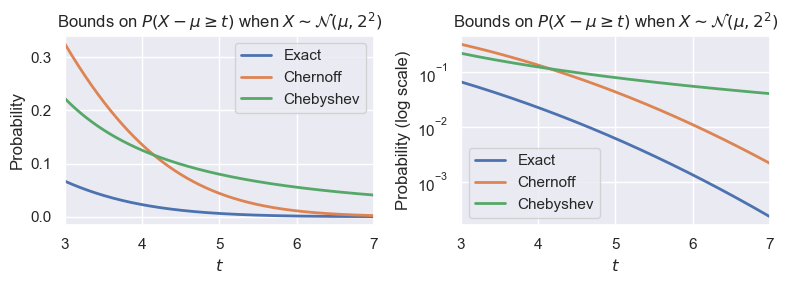

In [9]:
sigma = 2

t_min = 3
t_max = 7
t = np.linspace(t_min, t_max , 500)

chernoff = np.exp(-0.5*((t/sigma)**2))
chebyshev = 0.5 * ((sigma/t)**2)
exact_probability = 1 - stats.norm.cdf(t/sigma)

fig, axes = plt.subplots(1,2, figsize = (8,3))
for i, ax in enumerate(axes):
    ax.plot(t, exact_probability, label='Exact', lw=2)
    ax.plot(t, chernoff, lw=2, label='Chernoff')
    ax.plot(t, chebyshev, lw=2, label='Chebyshev')
    ax.set_xlim(t_min, t_max)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$t$')
    ax.legend()
    if i == 1:
        ax.semilogy()
        ax.set_ylabel('Probability (log scale)')
    else:
        ax.set_ylabel('Probability')
    ax.set_title(r'Bounds on $P(X - \mu \geq t)$ when $X \sim \mathcal{N}(\mu, 2^2)$')
plt.tight_layout()

#### Bounding the threshold for a given probability

Suppose that instead of being given a threshold and asked for the probability of exceeding it, we instead want the opposite: we want to know, given a desired probability, a bound or threshold such that the probability of exceeding that bound is small. This is the **upper confidence bound** we described earlier. To simplify our calculations, and without loss of generality, we'll assume that $\mu = 0$. If we go about computing this for the normal distribution, we find that:

* For Chebyshev's inequality, we have that $\epsilon = \frac{\sigma^2}{2\alpha^2}$, or that $\alpha(\epsilon) = \frac{\sigma}{\sqrt{2\epsilon}}$.
* For Chernoff's bound, we have that $\epsilon = \exp\left(-\frac{\alpha^2}{2\sigma^2}\right)$, or equivalently $\alpha(\epsilon) = \sigma\sqrt{2\log(1/\epsilon)}$.
* As we saw before, the exact probability is $F^{-1}(1-\epsilon)$.



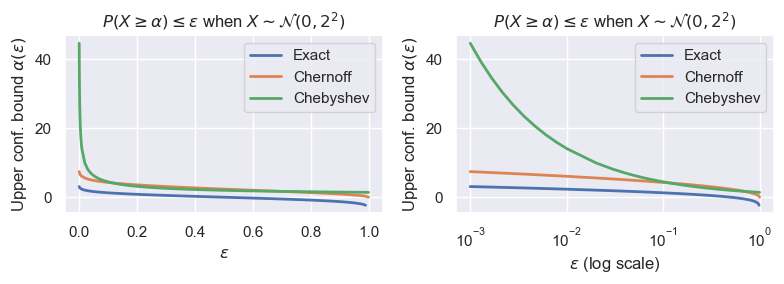

In [10]:
sigma = 2

eps_min = 0
eps_max = 1
eps = np.linspace(eps_min, eps_max, 100)
eps = np.hstack([np.logspace(np.log10(eps[1]), -3, 10)[::-1], eps[1:]])

chernoff = sigma * np.sqrt(-2*np.log(eps))
chebyshev = sigma / np.sqrt(2*eps)
exact_probability = stats.norm.ppf(1-eps)

fig, axes = plt.subplots(1,2, figsize = (8,3))
for i, ax in enumerate(axes):
    ax.plot(eps, exact_probability, label='Exact', lw=2)
    ax.plot(eps, chernoff, lw=2, label='Chernoff')
    ax.plot(eps, chebyshev, lw=2, label='Chebyshev')
    ax.set_ylabel(r'Upper conf. bound $\alpha(\epsilon)$')
    ax.legend()
    if i == 1:
        ax.semilogx()
        ax.set_xlabel(r'$\epsilon$ (log scale)')
    else:
        ax.set_xlabel(r'$\epsilon$')
    ax.set_title(r'$P(X \geq \alpha) \leq \epsilon$ when $X \sim \mathcal{N}(0, 2^2)$')
plt.tight_layout()

Both bounds are clearly loose (i.e., too large compared to the true value), but the Chernoff bound is much tighter for larger values of $t$ (or equivalently, for small values of $\epsilon$. 

It's a bit silly to compute Chernoff and Chebyshev tail bounds this way for normal random variables, because we already know the true probabilities. Still, this helps us understand how good those bounds are, and we'll see in the next section that we can apply these same bounds even in cases where we don't know the MGF exactly.

## Hoeffding's Inequality

So far, we've seen that using the MGF of a random variable can give us excellent tail bounds. But, if we know the MGF exactly, then we also know the distribution of the random variable, and in that case we might as well use the CDF to find tail bounds. As we saw in the previous example, even the Chernoff bound was not as good as using the actual CDF.

In that case, what's the point of the Chernoff bound? In many cases, we may not know the MGF, but we can **bound** it: in other words, we can find some function of $\lambda$, $h(\lambda)$, such that $M_X(\lambda) \leq \lambda ~ ~ \forall \lambda$.

One such example is that of **bounded** random variables: that is, random variables that only take on values between some lower bound $a$ and some upper bound $b$.

### Hoeffding's Lemma

Hoeffding's lemma gives us an upper bound on the MGF for any bounded random variable. Specifically, given a random variable $X$ with mean $E[X]$ that is bounded between $a$ and $b$, we have that

$$
M_X(\lambda) = E[e^{\lambda X}] \leq \exp\left\{\lambda E[X] + \frac{\lambda^2(b-a)^2}{8}\right\}
$$

For the proof and more on the lemma, see [the Hoeffding's lemma Wikipedia article](https://en.wikipedia.org/wiki/Hoeffding%27s_lemma).



In [11]:
YouTubeVideo('40RQ_O0VK7M')

### Hoeffding's Inequality

We could use Hoeffding's lemma on any bounded random variable, in combination with Chernoff's bound, to bound tail probabilities. For the rest of this section, we'll focus on the specific case of sample means, which is what Hoeffding's inequality is all about.

Let $X_1 ,X_2, \ldots, X_n$ be independent (but not necessarily identically distributed) random variables bounded between $a$ and $b$. Then Hoeffding's inequality states that:

$$
P\left(\frac{1}{n}\sum_{i=1}^n (X_i - \mathbb{E}[X_i]) \geq t\right) \leq \exp\left(-\frac{2nt^2}{(b-a)^2}\right) \\
P\left(\frac{1}{n}\sum_{i=1}^n (X_i - \mathbb{E}[X_i]) \leq -t\right) \leq \exp\left(-\frac{2nt^2}{(b-a)^2}\right).
$$

We also have the two-sided version:

$$
P\left(\left|\frac{1}{n}\sum_{i=1}^n (X_i - \mathbb{E}[X_i])\right| \geq t\right) \leq 2\exp\left(-\frac{2nt^2}{(b-a)^2}\right).
$$

In the case where the $X_i$ are identically distributed with mean $\mu$, we can rewrite the first version as:

$$
\mathbb{P}\left(\left[\frac{1}{n}\sum_{i=1}^n X_i\right] - \mu \geq t\right) \leq \exp\left(-\frac{2nt^2}{(b-a)^2}\right) \\
$$

This is a remarkable result! Recall that the Central Limit Theorem tells us that a similar result holds asymptotically: that is, for large values of $n$, the sample mean converges to a normal distribution, and therefore, the probability of obtaining a value far from the mean decreases as $e^{-t^2}$. But this statement holds for **any** value of $n$: whether $n$ is small or big, or the distribution of the $X_i$ is "nice" or not, this is true for the sample mean of any bounded random variables.

We can also know it without knowing anything else about the distribution of the random variables $X_i$, other than some bounds on them. 


Just as before, we can make some observations:

* *How fast does our bound increase as $\epsilon$ gets small?* Solving for an upper confidence bound $\alpha(\epsilon)$, we see that $\epsilon = \frac{M_X(\lambda)}{e^{\lambda \alpha}}$. Solving for $\alpha$ (see below for an example), we can see that it grows as $\log(\epsilon^{-1})$: this is much, much slower than our previous two results! So, if we can find a class of random variables where the MGF is known (or bounded, as in the previous observation), then we can place much tighter bounds on those random variables.

*Note a small error in the video below: the last equation should say $P(Y \leq -t)$, not $P(Y \leq t)$*

In [12]:
YouTubeVideo('f1tbEnldSt0')

### Example: Sample Mean with Hoeffding's inequality

Given $X_1, \ldots, X_n$ and their sample mean $Y$, how well does Hoefdding's inequality answer the question of whether $Y$ can be far from the true mean $\mu$? Answering this question simply requires us to state the inequality and then analyze the result:

$$
\mathbb{P}\left(Y - \mu \geq \alpha\right) \leq \exp\left(-\frac{2n\alpha^2}{(b-a)^2}\right) \\
$$

As expected (since Hoeffding's inequality is derived using the Chernoff bound), we see the same dependence on $n$: the probability decreases proportional to $e^{-n}$. As mentioned earlier, we also see a dependence on $\alpha$ of the form $e^{-\alpha^2}$, as we would with a normal random variable or with the Central Limit Theorem.

What if we were to ask for an upper confidence bound $\alpha(\epsilon)$ at a given level of confidence $\epsilon$? 

$$
\begin{align*}
\epsilon &= \exp\left(-\frac{2n\alpha^2}{(b-a)^2}\right) \\
(b-a)^2 \log(1/\epsilon) &= 2n\alpha^2 \\
\alpha &= |b-a|\sqrt{\frac{\log(1/\epsilon)}{2n}}
\end{align*}
$$

We can see that while this bound's dependence on $\epsilon$ is much better than what we saw with the Chebyshev bound, its dependence on $n$ is similar: **this bound also decreases proportional to $n^{-1/2}$**.

### Proof of Hoeffding's Inequality
Without loss of generality ,we can replace $X_i$ with $X_i - \mathbb{E}[X_i]$ if necessary, so we may assume that $\mathbb{E}[X_i] = 0$ for each $i$ to simplify our calculations. Let $Z = \sum_{i=1}^n \frac{X_i}{n}$, and observe that each term is bounded between $a/n$ and $b/n$. Then 

$$
\begin{align*}
M_Z(\lambda) &= \prod_{i=1}^n M_{X_i}(\lambda) \\
& \leq \prod_{i=1}^n \exp \left( \frac{(b-a)^2}{8n^2}\lambda^2 \right) \\
& = \exp \left( \frac{(b-a)^2}{8n}\lambda^2 \right)
\end{align*}
$$

Applying Chernoff's method:

$$
\begin{align*}
P(Z > t) ~ & \le ~ \min_{\lambda \geq 0} \exp \left( \frac{(b-a)^2 \lambda^2}{8n} - \lambda t \right) \\
& = \exp\left(-\frac{2nt^2}{(b-a)^2}\right).
\end{align*}
$$

The proof of the two-sided bound is left as an exercise (and/or can easily be looked up).

In [12]:
YouTubeVideo('OgdPPGNrRdM')

## Concentration Inequalities and Confidence intervals

We've seen many times that if we have an estimator $\hat{\theta}$, we can construct a confidence interval for that estimator by using the distribution of $\hat{\theta}$. Up until now, we've relied on either the bootstrap, computing the distribution exactly, or using the Central Limit Theorem to approximate it.

But, all of the methods we just discussed are applicable to any random variable! So, we could use any of them to construct a confidence interval for an estimator $\hat{\theta}$, especially if that estimator is a sample mean (but often even if it isn't). While the other approaches are perfectly valid, there are often cases where we might prefer a confidence interval from concentration inequalities instead:

* *Why concentration inequalities over computing the distribution exactly?* As we've already discussed, in many cases, we many not know the distribution of our random variables exactly, and computing the distribution exactly may not be feasible. 
* *Why concentration inequalities over bootstrap?* Using the bootstrap requires us to observe data and use that data to generate bootstrap resamples. In some cases, if we want to show a theoretical confidence interval before observing any data, it's useful to use concentration inequalities.
* *Why concentration inequalities over the Central Limit Theorem?* As we've already discussed, the Central Limit Theorem only applies for large values of $n$, while the results we've derived here are applicable for any value of $n$, and for any shape of distribution.

In [13]:
YouTubeVideo('uiwbn8DbCKk')